In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import csv
import pandas as pd
import numpy as np
from packer import Packer


In [3]:
df = pd.read_csv('dataset.csv', sep=',')
print(df)

       Order_ID  Product_ID  Quantity   L   W
0             1           0         5  29  19
1             1           1         5  29  19
2             1           2        10  29  19
3             1           3         4  29  19
4             1           4         6  29  19
...         ...         ...       ...  ..  ..
46602      2499          19         6  35  23
46603      2499          20         1  35  23
46604      2499          21         2  18  18
46605      2499          22         1  32  21
46606      2499          23         1  32  21

[46607 rows x 5 columns]


In [15]:
results = []
for order_id, order in df.groupby("Order_ID"):
    packer = Packer(order)
    try:
        packer.pack()
        packer.visualise()
        break
        
    except:
        continue
    liquid_filling = np.ceil((order["Quantity"] * order["L"] * order["W"]).sum() / (100*120))
    amount_of_layers = len(packer.layers.layers)
    results.append([order_id, liquid_filling, amount_of_layers])



15667


<Axes: xlabel='Liquid_Filling', ylabel='Amount_of_Layers'>

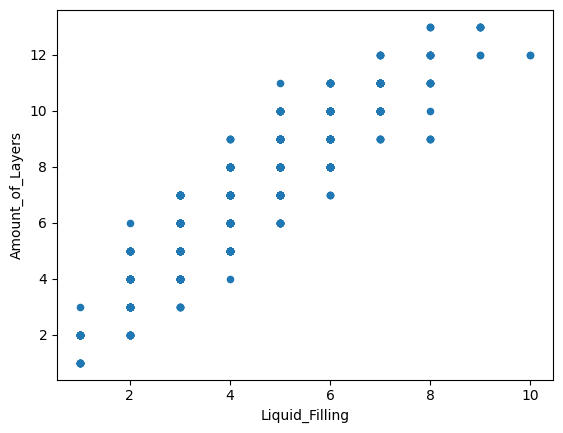

In [14]:
results_df = pd.DataFrame(results, columns=["Order_ID", "Liquid_Filling", "Amount_of_Layers"])

results_df.to_csv("results.csv", index=False)
results_df.head()

print(results_df["Amount_of_Layers"].sum())

results_df.plot.scatter(x="Liquid_Filling", y="Amount_of_Layers")